In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [17]:
"""
Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al
in the 1930s.  They represent observed attendance at 14 social events
by 18 Southern women.  The graph is bipartite (clubs, women).

Data from:
http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm

"""
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""
__date__ = "$Date: 2005-05-12 14:33:11 -0600 (Thu, 12 May 2005) $"
__credits__ = """"""
__revision__ = "$Revision: 998 $"
#    Copyright (C) 2004 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import string
import networkx as nx

def davis_club_graph(create_using=None, **kwds):
    nwomen=14
    nclubs=18
    G=nx.generators.empty_graph(nwomen+nclubs,create_using=create_using,**kwds)
    G.clear()
    G.name="Davis Southern Club Women"

    women="""\
EVELYN
LAURA
THERESA
BRENDA
CHARLOTTE
FRANCES
ELEANOR
PEARL
RUTH
VERNE
MYRNA
KATHERINE
SYLVIA
NORA
HELEN
DOROTHY
OLIVIA
FLORA"""

    clubs="""\
E1
E2
E3
E4
E5
E6
E7
E8
E9
E10
E11
E12
E13
E14"""

    davisdat="""\
1 1 1 1 1 1 0 1 1 0 0 0 0 0
1 1 1 0 1 1 1 1 0 0 0 0 0 0
0 1 1 1 1 1 1 1 1 0 0 0 0 0
1 0 1 1 1 1 1 1 0 0 0 0 0 0
0 0 1 1 1 0 1 0 0 0 0 0 0 0
0 0 1 0 1 1 0 1 0 0 0 0 0 0
0 0 0 0 1 1 1 1 0 0 0 0 0 0
0 0 0 0 0 1 0 1 1 0 0 0 0 0
0 0 0 0 1 0 1 1 1 0 0 0 0 0
0 0 0 0 0 0 1 1 1 0 0 1 0 0
0 0 0 0 0 0 0 1 1 1 0 1 0 0
0 0 0 0 0 0 0 1 1 1 0 1 1 1
0 0 0 0 0 0 1 1 1 1 0 1 1 1
0 0 0 0 0 1 1 0 1 1 1 1 1 1
0 0 0 0 0 0 1 1 0 1 1 1 1 1
0 0 0 0 0 0 0 1 1 1 0 1 0 0
0 0 0 0 0 0 0 0 1 0 1 0 0 0
0 0 0 0 0 0 0 0 1 0 1 0 0 0"""


    # women names
    w={}
    n=0
    for name in women.split('\n'):
        w[n]=name
        n+=1

    # club names
    c={}
    n=0
    for name in clubs.split('\n'):
        c[n]=name
        n+=1

    # parse matrix
    row=0
    for line in davisdat.split('\n'):
        thisrow=list(map(int,line.split(' ')))
        for col in range(0,len(thisrow)):
            if thisrow[col]==1:
                G.add_edge(w[row],c[col])
        row+=1
    return (G,list(w.values()),list(c.values()))

def project(B,pv,result=False,**kwds):
    """
    Returns a graph that is the unipartite projection of the
    bipartite graph B onto the set of nodes given in list pv.

    The nodes retain their names and are connected if they share a
    common node in the vertex set of {B not pv}.

    No attempt is made to verify that the input graph B is bipartite.
    """
    if result:
        G=result
    else:
        G=nx.Graph(**kwds)
    for v in pv:
        G.add_node(v)
        for cv in B.neighbors(v):
            G.add_edges_from([(v,u) for u in B.neighbors(cv)])
    return G

if __name__ == "__main__":
    # return graph and women and clubs lists
    (G,women,clubs)=davis_club_graph()

    # project bipartite graph onto women nodes
    W=project(G,women)
    # project bipartite graph onto club nodes
    C=project(G,clubs)

In [18]:
(G,Women,Socials) = davis_club_graph()

In [19]:
Women

['EVELYN',
 'LAURA',
 'THERESA',
 'BRENDA',
 'CHARLOTTE',
 'FRANCES',
 'ELEANOR',
 'PEARL',
 'RUTH',
 'VERNE',
 'MYRNA',
 'KATHERINE',
 'SYLVIA',
 'NORA',
 'HELEN',
 'DOROTHY',
 'OLIVIA',
 'FLORA']

In [20]:
Socials

['E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

First we will look at basic graphs of the two different nodes. The graph of the Women shows that they hare highly interconnected. Using the shell layout, it appears that the almost all of the women are connected to all of the other women. The graph of the different Socials also appear highly interconnected, though clearly not as enmeshed as the network of women. In the first graph we see the network of 18 women. We see from the printed degree distribution that the it is so enmeshed, the number of "friends" ranges from 13-19. This is possible because the number of women exceeds the number of social clubs. The club network is less enmeshed, as there are 11 clubs with 10 members and 4 clubs with 15. Women can be at multiple social clubs/events, but no club has all the women.   

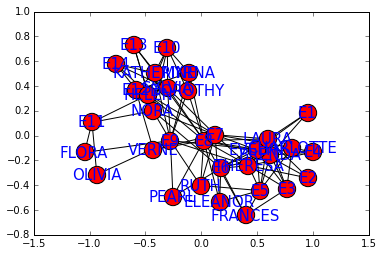

In [21]:
W = project(G, Women)
nx.draw_networkx(G,node_color='red',font_color="blue",font_size=15)
plt.show()

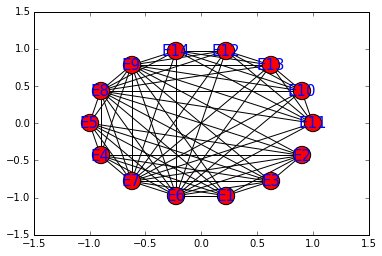

In [22]:
S = project(G, Socials)
nx.draw_networkx(S,node_color='red',font_color="blue",font_size=15,pos=nx.shell_layout(S))
plt.show()

Degree Centrality for the women shows us that the 4 clubs with 15 members - E6,E7,E8,E9 - have the highest centrality.

In [23]:
degree_centrality_socials = nx.degree_centrality(S)
degree_centrality_socials = sorted(degree_centrality_socials.iteritems(),key=lambda(k,v):(-v,k))
degree_centrality_socials

[('E6', 1.153846153846154),
 ('E7', 1.153846153846154),
 ('E8', 1.153846153846154),
 ('E9', 1.153846153846154),
 ('E1', 0.7692307692307693),
 ('E10', 0.7692307692307693),
 ('E11', 0.7692307692307693),
 ('E12', 0.7692307692307693),
 ('E13', 0.7692307692307693),
 ('E14', 0.7692307692307693),
 ('E2', 0.7692307692307693),
 ('E3', 0.7692307692307693),
 ('E4', 0.7692307692307693),
 ('E5', 0.7692307692307693)]

In [24]:
S.degree()

{'E1': 10,
 'E10': 10,
 'E11': 10,
 'E12': 10,
 'E13': 10,
 'E14': 10,
 'E2': 10,
 'E3': 10,
 'E4': 10,
 'E5': 10,
 'E6': 15,
 'E7': 15,
 'E8': 15,
 'E9': 15}

For women, degree centrality and betweenness centrality are virtually the same. 

In [25]:
betweenness_centrality_women = nx.betweenness_centrality(W)
betweenness_centrality_women = sorted(betweenness_centrality_women.iteritems(),key=lambda(k,v):(-v,k))
betweenness_centrality_women

[('EVELYN', 0.010122230710466005),
 ('HELEN', 0.010122230710466005),
 ('NORA', 0.010122230710466005),
 ('RUTH', 0.010122230710466005),
 ('SYLVIA', 0.010122230710466005),
 ('THERESA', 0.010122230710466005),
 ('VERNE', 0.010122230710466005),
 ('DOROTHY', 0.0053475935828877),
 ('KATHERINE', 0.0053475935828877),
 ('MYRNA', 0.0053475935828877),
 ('PEARL', 0.0053475935828877),
 ('BRENDA', 0.0026737967914438505),
 ('ELEANOR', 0.0026737967914438505),
 ('FRANCES', 0.0026737967914438505),
 ('LAURA', 0.0026737967914438505),
 ('CHARLOTTE', 0.0),
 ('FLORA', 0.0),
 ('OLIVIA', 0.0)]

In [26]:
degree_centrality_women = nx.degree_centrality(W)
degree_centrality_women = sorted(degree_centrality_women.iteritems(),key=lambda(k,v):(-v,k))
degree_centrality_women

[('EVELYN', 1.1176470588235294),
 ('HELEN', 1.1176470588235294),
 ('NORA', 1.1176470588235294),
 ('RUTH', 1.1176470588235294),
 ('SYLVIA', 1.1176470588235294),
 ('THERESA', 1.1176470588235294),
 ('VERNE', 1.1176470588235294),
 ('DOROTHY', 1.0588235294117647),
 ('KATHERINE', 1.0588235294117647),
 ('MYRNA', 1.0588235294117647),
 ('PEARL', 1.0588235294117647),
 ('BRENDA', 1.0),
 ('ELEANOR', 1.0),
 ('FRANCES', 1.0),
 ('LAURA', 1.0),
 ('FLORA', 0.8235294117647058),
 ('OLIVIA', 0.8235294117647058),
 ('CHARLOTTE', 0.7647058823529411)]

In [27]:
print("Degree distributions of projected graphs")
print('')
print("Member #Friends")
for v in W:
    print('%s %d' % (v,W.degree(v)))

print('')
print("Clubs #Members")
for v in C:
    print('%s %d' % (v,C.degree(v)))

Degree distributions of projected graphs

Member #Friends
CHARLOTTE 13
FLORA 14
BRENDA 17
MYRNA 18
PEARL 18
EVELYN 19
THERESA 19
FRANCES 17
LAURA 17
VERNE 19
NORA 19
KATHERINE 18
ELEANOR 17
HELEN 19
DOROTHY 18
OLIVIA 14
SYLVIA 19
RUTH 19

Clubs #Members
E11 10
E10 10
E13 10
E12 10
E14 10
E9 15
E8 15
E5 10
E4 10
E7 15
E6 15
E1 10
E3 10
E2 10


These statistics tell us pretty much what we can deduce from the outset - that with two small sets of nodes and each node in each of the sets having a high number of edges to the other, we will have a degree of centrality. From looking at the number of degrees, we know that each of the clubs has more than half of the women as members and each of the women is in at least one club with at least three-quarters of the other women. Some of the women - those with 19 degrees - are linked with every single one of the other women (self included). 